In [6]:
import json

#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler
import wfdb
from sklearn.preprocessing import Normalizer
from matplotlib import colors
from scipy.stats import norm
import random 

plt.rcParams["figure.figsize"] = (15,6)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'b'
plt.rcParams['axes.grid'] = True

In [7]:
from syntmodel.synt_gen import model, generate_sinus_randomset
from syntmodel.utils_model import Prms

# Function to load parameters from files
def load_params(param_files):
    params_list = []
    for file in param_files:
        with open(file, 'rb') as f:
            params = pickle.load(f)
        params_list.append(params)
    return params_list

# Function to generate datasets and return a pandas DataFrame
def generate_datasets_df(params_list, N, fs, sample_time, n_samples):
    data_records = []

    for _ in range(N):
        selected_params = np.random.choice(params_list)
        params = Prms(**selected_params)

        ecg_dataset, ecg_noise_set = generate_sinus_randomset(params, fs, sample_time, n_samples)

        for data, noise_signal in zip(ecg_dataset, ecg_noise_set):

            ecg_signal, p_indices, q_indices, r_indices, s_indices, t_indices = data  # Unpacking the data correctly
            data_records.append({
                'ECG Signal': ecg_signal,
                'Noise Signal': noise_signal,
                'P Indices': p_indices,
                'Q Indices': q_indices,
                'R Indices': r_indices,
                'S Indices': s_indices,
                'T Indices': t_indices,
                'Params': selected_params
            })

    return pd.DataFrame(data_records)

In [8]:
#GENERATE 5000 Sinus ECG Signals of length:  10 seconds
# Step 1: Load and store parameters
param_files = [f"synth_params/sinus_synth_beat_{i}.p" for i in range(18)]
params_list = load_params(param_files)

# Step 2 to 4: Generate datasets
# Generate datasets and organize into a DataFrame
N = 500  # Number of datasets to generate per random params (Total number of signals = N * n_samples) 
fs = 250  # Sample rate
sample_time = 10  # Seconds per sample
n_samples = 10  # Number of samples per dataset

def generate_synth_sinus_dataset(params_list, N, fs, sample_time, n_samples):
    
    sinus_df = generate_datasets_df(params_list, N, fs, sample_time, n_samples)
    return sinus_df
# Verify the shape of the DataFrame
sinus_df =  generate_synth_sinus_dataset(params_list, N, fs, sample_time, n_samples)

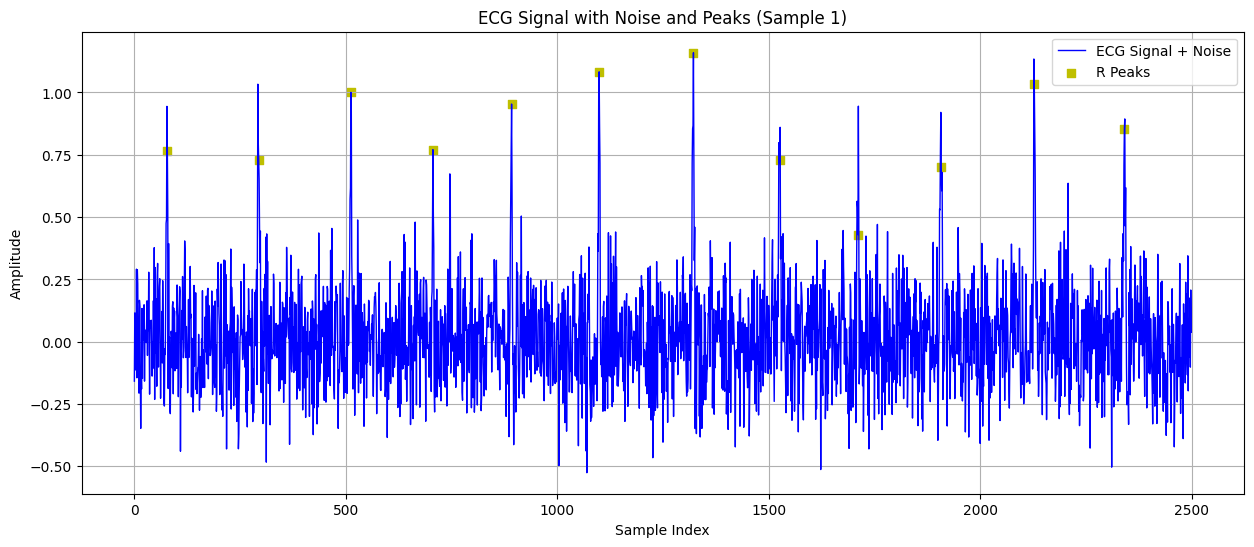

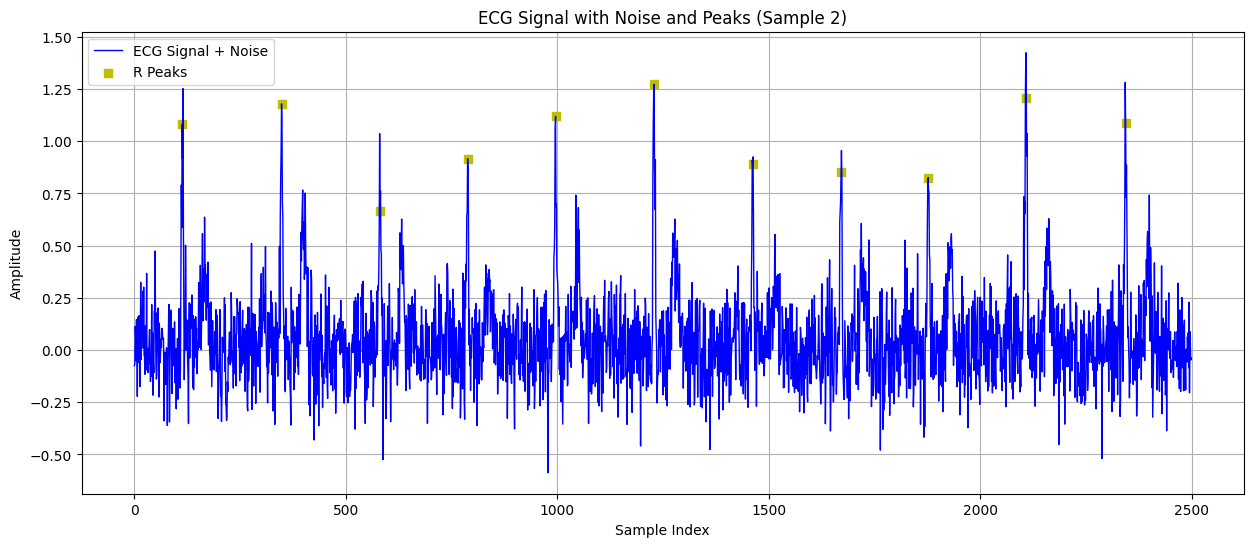

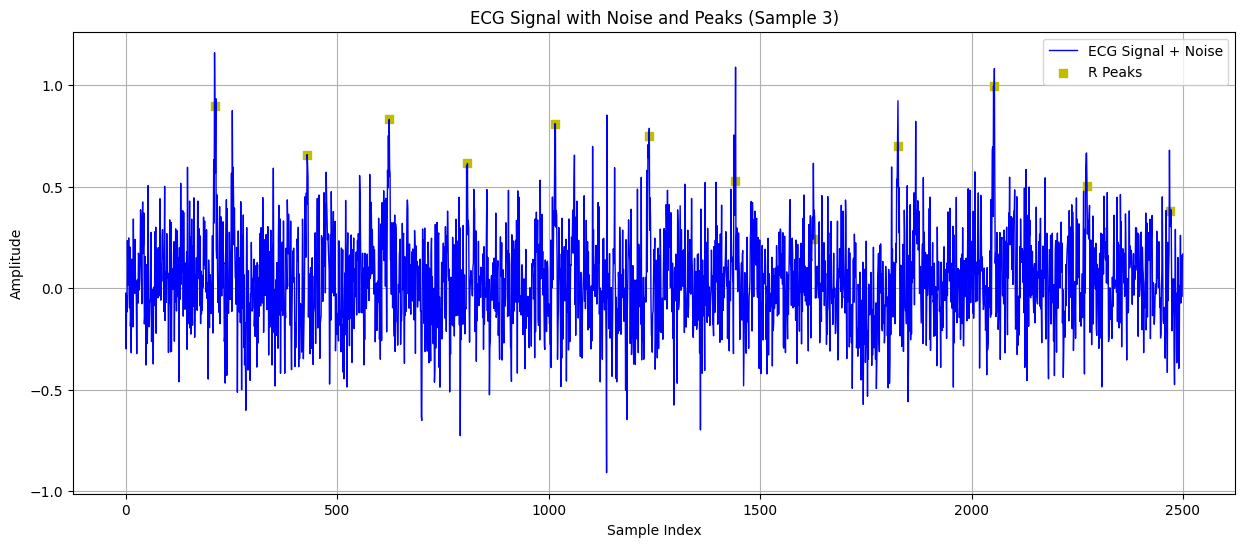

In [10]:
import matplotlib.pyplot as plt

# Function to plot ECG signals with noise and peak markers
def plot_ecg_signals_with_peaks(df, num_plots=1):
    for i in range(num_plots):
        ecg_signal = df.iloc[i]['ECG Signal']
        noise_signal = df.iloc[i]['Noise Signal']
        combined_signal = ecg_signal + noise_signal
        
        p_indices = df.iloc[i]['P Indices']
        q_indices = df.iloc[i]['Q Indices']
        r_indices = df.iloc[i]['R Indices']
        s_indices = df.iloc[i]['S Indices']
        t_indices = df.iloc[i]['T Indices']

        plt.plot(combined_signal, label='ECG Signal + Noise', color='b')
        
        #plt.scatter(p_indices, combined_signal[p_indices], color='r', label='P Peaks', marker='o')
        #plt.scatter(q_indices, combined_signal[q_indices], color='g', label='Q Peaks', marker='x')
        plt.scatter(r_indices, combined_signal[r_indices], color='y', label='R Peaks', marker='s')
        #plt.scatter(s_indices, combined_signal[s_indices], color='m', label='S Peaks', marker='d')
        #plt.scatter(t_indices, combined_signal[t_indices], color='c', label='T Peaks', marker='^')
        
        plt.title(f'ECG Signal with Noise and Peaks (Sample {i+1})')
        plt.xlabel('Sample Index')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.grid(True)
        plt.show()

# Example usage:
# Plot the first 5 ECG signals in the DataFrame
plot_ecg_signals_with_peaks(sinus_df, num_plots=3)

In [5]:
sinus_df.to_pickle('sinus_dataset.pkl')
